In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def f(x):
    return 3 * x ** 2 + 2 * x - 1

In [3]:
f(2.0)

15.0

In [4]:
xs = np.linspace(-2, 2, 100)

xs

array([-2.        , -1.95959596, -1.91919192, -1.87878788, -1.83838384,
       -1.7979798 , -1.75757576, -1.71717172, -1.67676768, -1.63636364,
       -1.5959596 , -1.55555556, -1.51515152, -1.47474747, -1.43434343,
       -1.39393939, -1.35353535, -1.31313131, -1.27272727, -1.23232323,
       -1.19191919, -1.15151515, -1.11111111, -1.07070707, -1.03030303,
       -0.98989899, -0.94949495, -0.90909091, -0.86868687, -0.82828283,
       -0.78787879, -0.74747475, -0.70707071, -0.66666667, -0.62626263,
       -0.58585859, -0.54545455, -0.50505051, -0.46464646, -0.42424242,
       -0.38383838, -0.34343434, -0.3030303 , -0.26262626, -0.22222222,
       -0.18181818, -0.14141414, -0.1010101 , -0.06060606, -0.02020202,
        0.02020202,  0.06060606,  0.1010101 ,  0.14141414,  0.18181818,
        0.22222222,  0.26262626,  0.3030303 ,  0.34343434,  0.38383838,
        0.42424242,  0.46464646,  0.50505051,  0.54545455,  0.58585859,
        0.62626263,  0.66666667,  0.70707071,  0.74747475,  0.78

In [5]:
ys = f(xs)

ys

array([ 7.        ,  6.60085706,  6.21150903,  5.83195592,  5.46219773,
        5.10223447,  4.75206612,  4.41169268,  4.08111417,  3.76033058,
        3.4493419 ,  3.14814815,  2.85674931,  2.57514539,  2.30333639,
        2.04132231,  1.78910315,  1.54667891,  1.31404959,  1.09121518,
        0.8781757 ,  0.67493113,  0.48148148,  0.29782675,  0.12396694,
       -0.04009795, -0.19436792, -0.33884298, -0.47352311, -0.59840833,
       -0.71349862, -0.818794  , -0.91429446, -1.        , -1.07591062,
       -1.14202632, -1.19834711, -1.24487297, -1.28160392, -1.30853994,
       -1.32568105, -1.33302724, -1.33057851, -1.31833486, -1.2962963 ,
       -1.26446281, -1.2228344 , -1.17141108, -1.11019284, -1.03917968,
       -0.95837159, -0.8677686 , -0.76737068, -0.65717784, -0.53719008,
       -0.40740741, -0.26782981, -0.1184573 ,  0.04071013,  0.20967248,
        0.38842975,  0.57698194,  0.77532905,  0.98347107,  1.20140802,
        1.42913988,  1.66666667,  1.91398837,  2.17110499,  2.43

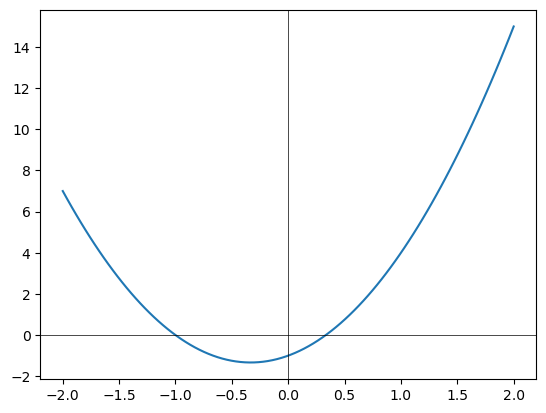

In [6]:
plt.plot(xs, ys); plt.axhline(0, color='black', lw=0.5); plt.axvline(0, color='black', lw=0.5)

In [7]:
# If the value of h is too small, the result will be inaccurate because of the floating point precision

h = 1e-20

x = 2.0

(f(x + h) - f(x)) / h

0.0

In [8]:
h = 1e-6

x = 2.0

(f(x + h) - f(x)) / h

14.000003002223593

In [9]:
6 * x + 2

14.0

In [10]:
x = -1/3

(f(x + h) - f(x)) / h

3.000044657142098e-06

In [11]:
# Let's get more complex

a = 2.0
b = -3.0
c = 10.0

d = a * b + c

d

4.0

In [12]:
# The derivative of d with respect to a is b

h = 1e-6

d = a * b + c

d_a = (a + h) * b + c

(d_a - d) / h


-3.000000000419334

In [13]:
class Value:
    def __init__(self, data, _children=(), _op='', _label=''):
        self.data = data
        # The gradient of the value (the derivative of the output value with respect to this value)
        # A value of 0 means we assume that the value has "no impact" on the output value initially
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self._label = _label

    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')

    def __repr__(self):
        return f'Value(data={self.data}, grad={self.grad})'

In [14]:
def calculate_derivatives(a, b, c, d, e, f, L, h=1e-6):

    # Derivative with respect to a
    a1 = a + Value(h)
    d1 = a1 * b
    e1 = d1 + c
    L_a = e1 * f
    dL_da = (L_a.data - L.data) / h
    
    # Derivative with respect to b
    b1 = b + Value(h)
    d1 = a * b1
    e1 = d1 + c
    L_b = e1 * f
    dL_db = (L_b.data - L.data) / h
    
    # Derivative with respect to c
    c1 = c + Value(h)
    d1 = a * b
    e1 = d1 + c1
    L_c = e1 * f
    dL_dc = (L_c.data - L.data) / h
    
    # Derivative with respect to d
    d1 = d + Value(h)
    e1 = d1 + c
    L_d = e1 * f
    dL_dd = (L_d.data - L.data) / h

    # Derivative with respect to e
    e1 = e + Value(h)
    L_e = e1 * f
    dL_de = (L_e.data - L.data) / h

    # Derivative with respect to f
    f1 = f + Value(h)
    L_f = e * f1
    dL_df = (L_f.data - L.data) / h

    # Derivative with respect to L
    L1 = L + Value(h)
    dL_dL = (L1.data - L.data) / h

    return {
        'dL_da': dL_da,
        'dL_db': dL_db,
        'dL_dc': dL_dc,
        'dL_dd': dL_dd,
        'dL_de': dL_de,
        'dL_df': dL_df,
        'dL_dL': dL_dL
    }

a = Value(2.0, _label='a')
b = Value(-3.0, _label='b')
c = Value(10.0, _label='c')
d = a * b; d._label = 'd'
e = d + c; e._label = 'e'
f = Value(-2.0, _label='f')
L = e * f; L._label = 'L'

derivatives = calculate_derivatives(a, b, c, d, e, f, L)

for var, derivative in derivatives.items():
    print(f"{var}: {derivative}")

dL_da: 6.000000000838668
dL_db: -4.000000000559112
dL_dc: -1.999999998503199
dL_dd: -2.000000000279556
dL_de: -2.000000000279556
dL_df: 3.9999999996709334
dL_dL: 1.000000000139778


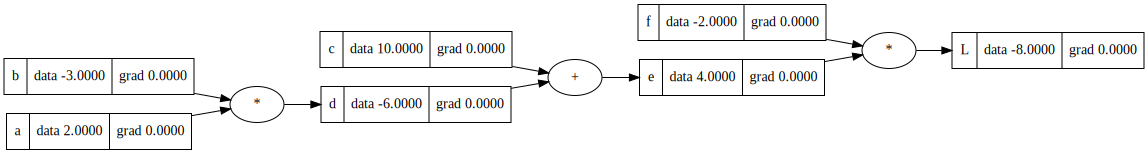

In [15]:
from graphviz import Digraph

def trace(root):
  # Builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # For any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n._label, n.data, n.grad), shape='record')
    if n._op:
      # If this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # And connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # Connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

draw_dot(L)

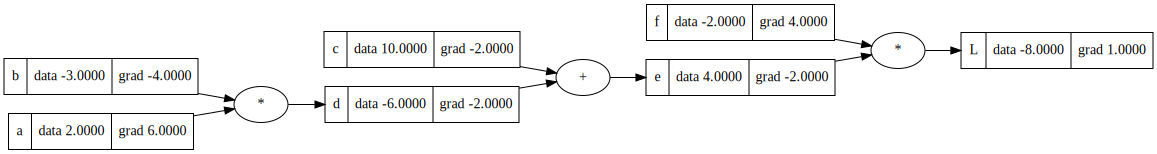

In [16]:
# The gradient of L with respect to itself is always 1
# dL / dL = 1
L.grad = 1.0

# dL / dE = f

# (z(x + h) - z(x)) / h

# ((e + h) * f - e * f) / h
# (e * f + h * f - e * f) / h
# h * f / h
# f

# So the gradient of L with respect to E is f
e.grad = f.data
# Similarly, the gradient of L with respect to F is e
f.grad = e.data

# dE / dC = 1

# ((c + h + d) - (c + d)) / h
# (c + h + d - c - d) / h
# h / h
# 1

# So the gradient of E with respect to C is 1
# By symmetry, the gradient of E with respect to D is also 1

# Using the chain rule, we can calculate the gradient of L with respect to C and D
# dL / dC = dL / dE * dE / dC = f * 1 = f
c.grad = f.data
# dL / dD = dL / dE * dE / dD = f * 1 = f
d.grad = f.data

# Through the same process, we can calculate the gradient of L with respect to A and B
# dL / dA = dL / dD * dD / dA = f * b = f * b
a.grad = f.data * b.data

# dL / dB = dL / dD * dD / dB = f * a = f * a
b.grad = f.data * a.data

draw_dot(L)

In [17]:
# If we want to increase the value of L, we can reduce the values with negative gradients and increase the values with positive gradients

a.data += 0.01 * a.grad
b.data -= 0.01 * b.grad
c.data -= 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)

-7.687904


In [18]:
# Gradient check vs. Numerical gradient
# The gradient check is useful to verify that the code for calculating the gradients is correct
# The numerical gradient is calculated using the formula (f(x + h) - f(x)) / h

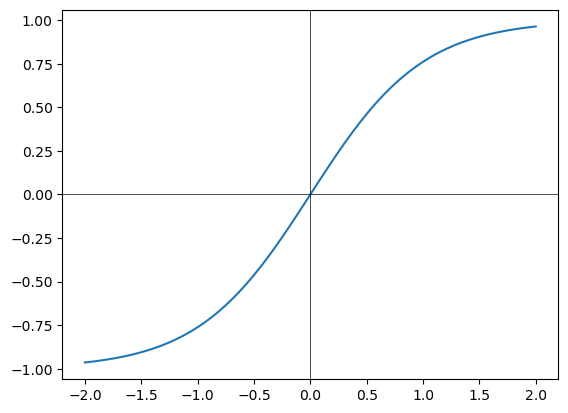

In [19]:
# tanh(x) is the hyperbolic tangent function and is often used in neural networks to introduce non-linearity in the model
# there are other activation/squashing functions like sigmoid, relu, etc.

plt.plot(np.linspace(-2, 2, 100), np.tanh(np.linspace(-2, 2, 100))); plt.axhline(0, color='black', lw=0.5); plt.axvline(0, color='black', lw=0.5)

In [20]:
# tanh(x) requires exponentiation and division, which are not supported by the current Value class
# Since we know the local derivative of tanh(x) is 1 - tanh(x) ** 2, we can add a new method to the Value class to calculate the 
# derivative of tanh(x) with respect to x directly and not break it into its atomic operations

class Value:
    def __init__(self, data, _children=(), _op='', _label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self._label = _label

    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')
    
    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)
        return Value(t, (self,), 'tanh')

    def __repr__(self):
        return f'Value(data={self.data}, grad={self.grad})'

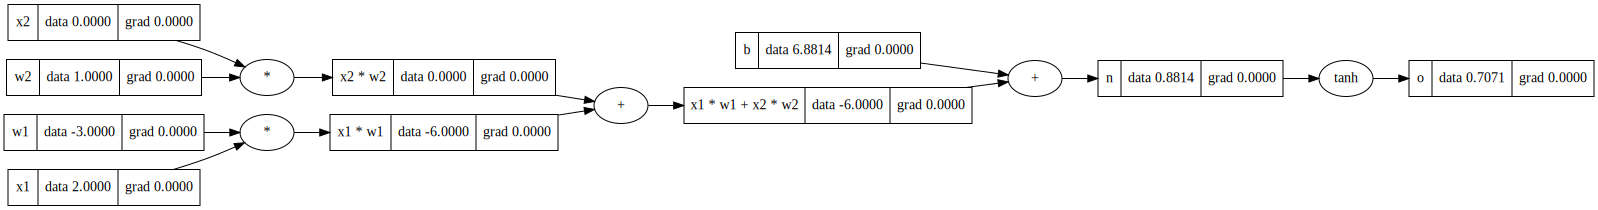

In [21]:
# This represents the computation graph for a single neuron in a neural network

# Inputs x1, x2
x1 = Value(2.0, _label='x1')
x2 = Value(0.0, _label='x2')

# Weights w1, w2
w1 = Value(-3.0, _label='w1')
w2 = Value(1.0, _label='w2')

# Bias of the neuron
b = Value(6.8813735870195432, _label='b')

# x1 * w1
x1w1 = x1 * w1; x1w1._label = 'x1 * w1'
# x2 * w2
x2w2 = x2 * w2; x2w2._label = 'x2 * w2'

# x1 * w1 + x2 * w2
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2._label = 'x1 * w1 + x2 * w2'

# x1 * w1 + x2 * w2 + b
n = x1w1x2w2 + b; n._label = 'n'

# tanh(x1 * w1 + x2 * w2 + b)
o = n.tanh(); o._label = 'o'

draw_dot(o)

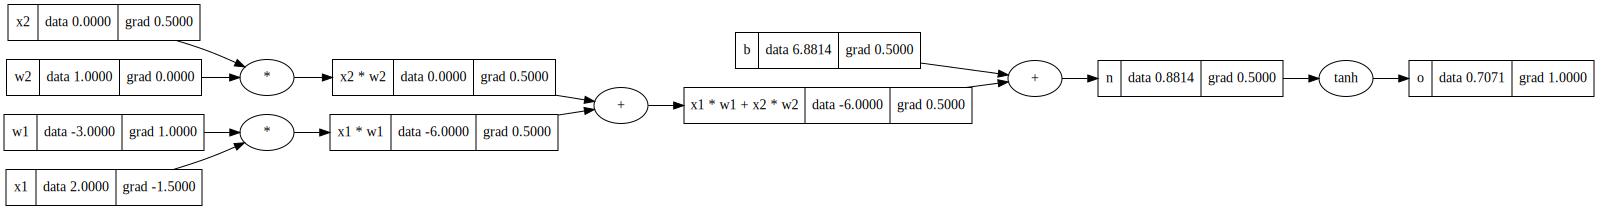

In [22]:
# In a neural network, we only care about the gradients of the loss with respect to the weights and biases of the network

# As we learned earlier, the gradient of a value with respect to itself is always 1
# dO / dO = 1
o.grad = 1.0

# The derivative of tanh(x) with respect to x is (1 - tanh(x) ** 2)
# Since o = tanh(n), dO / dN = 1 - o ** 2
n.grad = 1 - o.data ** 2
 
# In an addition operation, the gradient is simply distributed to all the inputs
# dO / dX1W1X2W2 = dO / dN * dN / dX1W1X2W2 = dO / dB = dO / dN * dN / dB = (1 - o ** 2) * 1
x1w1x2w2.grad = b.grad = n.grad

# We again have an addition operation, so the gradient of the output flows back to the inputs
# dO / dX1W1 = dO / dX1W1X2W2 * dX1W1X2W2 / dX1W1 = dO / dX2W2 = dO / dX1W1X2W2 * dX1W1X2W2 / dX2W2 = (1 - o ** 2) * 1
x1w1.grad = x2w2.grad = x1w1x2w2.grad

# The local derivative of the multiplication operation is the value of the other input
# dO / dX1 = dO / dX1W1 * dX1W1 / dX1 = (1 - o ** 2) * w1
x1.grad = x1w1.grad * w1.data

# The same is true for the other inputs, so we can calculate the gradients for all the weights and biases
# dO / dW1 = dO / dX1W1 * dX1W1 / dW1 = (1 - o ** 2) * x1
w1.grad = x1w1.grad * x1.data
# dO / dX2 = dO / dX2W2 * dX2W2 / dX2 = (1 - o ** 2) * w2
x2.grad = x2w2.grad * w2.data
# dO / dW2 = dO / dX2W2 * dX2W2 / dW2 = (1 - o ** 2) * x2
w2.grad = x2w2.grad * x2.data

# We can see that the gradient of the output with respect to w2 is 0
# This is correct because the value of w2 does not affect the output of the neuron since it is always multiplied by 0

draw_dot(o)

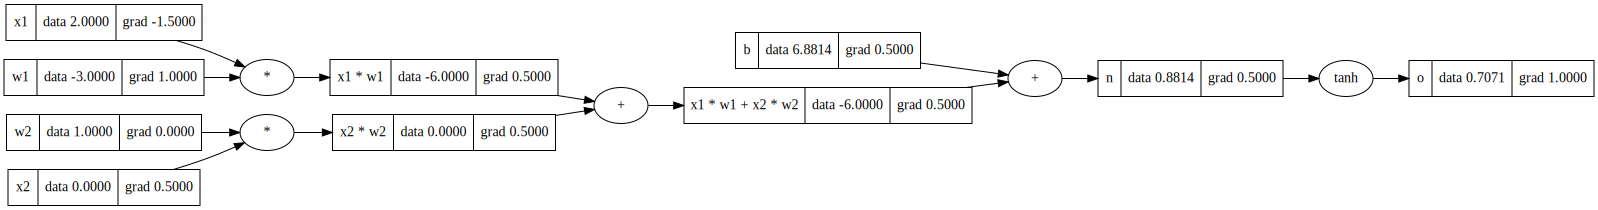

In [23]:
# Now that we understood how to perform backpropagation in a neural network manually, we can change the Value class to
# automatically calculate the gradients for us

class Value:
    def __init__(self, data, _children=(), _op='', _label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self._label = _label

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')

        # In an addition operation, the gradient of the output is simply distributed to all the inputs
        # because the local derivative of the addition operation is 1
        def _backward():
            self.grad = out.grad
            other.grad = out.grad

        out._backward = _backward

        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        # In a multiplication operation, the gradient is distributed to the inputs based on the local derivative
        # and the local derivative is the value of the other input
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad

        out._backward = _backward

        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)
        out = Value(t, (self,), 'tanh')

        # In the tanh operation, the gradient is also distributed to the input based on the local derivative
        # and the local derivative is (1 - tanh(x) ** 2) 
        def _backward():
            self.grad = (1 - out.data ** 2) * out.grad

        out._backward = _backward

        return out
    
    def backward(self):
        # In this implementation, we will perform the backward pass in a topological order to ensure that the gradient 
        # of a node is calculated only after all its children have been visited
        # In a standard feedforward neural network, backpropagation follows a natural reverse order
        # of layers, and topological sorting is not explicitly required. However, in more complex architectures that involve
        # skip connections, residual connections, or recurrent connections, topological sorting is necessary

        # The gradient of the output value is 1
        self.grad = 1.0

        # List to hold the nodes in topologically sorted order
        topo_order = []
        visited = set()

        def _topo_sort(v):
            # Topologically sort the graph nodes
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    _topo_sort(child)
                # Once all children are visited, add the current node to topo_order
                # This means that all leaf nodes are added first, then their parents, and so on
                topo_order.append(v)

        # Build topological order starting from the current node
        _topo_sort(self)

        # Now we can perform the backward pass in the topologically sorted order
        for node in reversed(topo_order):
            node._backward()  # Call the backward function for each node

    def __repr__(self):
        return f'Value(data={self.data}, grad={self.grad})'
    

# Inputs x1, x2
x1 = Value(2.0, _label='x1')
x2 = Value(0.0, _label='x2')

# Weights w1, w2
w1 = Value(-3.0, _label='w1')
w2 = Value(1.0, _label='w2')

# Bias of the neuron
b = Value(6.8813735870195432, _label='b')

# x1 * w1
x1w1 = x1 * w1; x1w1._label = 'x1 * w1'
# x2 * w2
x2w2 = x2 * w2; x2w2._label = 'x2 * w2'

# x1 * w1 + x2 * w2
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2._label = 'x1 * w1 + x2 * w2'

# x1 * w1 + x2 * w2 + b
n = x1w1x2w2 + b; n._label = 'n'

# tanh(x1 * w1 + x2 * w2 + b)
o = n.tanh(); o._label = 'o'

o.backward()

draw_dot(o)

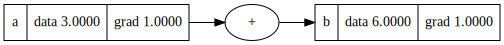

In [24]:
# Here, we have an error in the calculation of the gradient of b with respect to a
# The gradient should be 2, but it is 1
# This is because the current implementation of the Value class treats a + a as two separate nodes (a + a) instead of (2 * a)
# To fix this, we need to add up the gradients of all the incoming edges to a node instead of overwriting the gradient each time we add a new edge to the node

a = Value(3.0, _label='a')
b = a + a; b._label = 'b'

b.backward()

draw_dot(b)

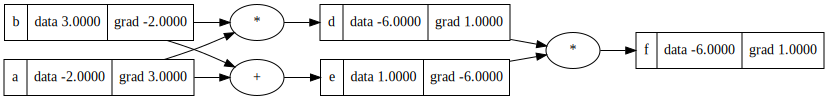

In [25]:
a = Value(-2.0, _label='a')
b = Value(3.0, _label='b')

d = a * b; d._label = 'd'
e = a + b; e._label = 'e'
f = d * e; f._label = 'f'

f.backward()

draw_dot(f)

In [26]:
# The solution is to accumulate the gradients of all the incoming edges to a node as it is described
# in the multivariable case of the chain rule

class Value:
    def __init__(self, data, _children=(), _op='', _label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self._label = _label

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            # Here, we accumulate the gradients of all the incoming edges to a node to avoid overwriting the gradient
            self.grad += out.grad
            other.grad += out.grad

        out._backward = _backward

        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward

        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad += (1 - out.data ** 2) * out.grad

        out._backward = _backward

        return out
    
    def backward(self):
        self.grad = 1.0

        topo_order = []
        visited = set()

        def _topo_sort(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    _topo_sort(child)
                topo_order.append(v)

        _topo_sort(self)

        for node in reversed(topo_order):
            node._backward()

    def __repr__(self):
        return f'Value(data={self.data}, grad={self.grad})'

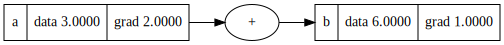

In [27]:
# Now, it works as expected and the gradient of b with respect to a is 2

a = Value(3.0, _label='a')
b = a + a; b._label = 'b'

b.backward()

draw_dot(b)

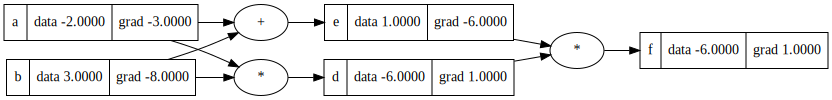

In [28]:
a = Value(-2.0, _label='a')
b = Value(3.0, _label='b')

d = a * b; d._label = 'd'
e = a + b; e._label = 'e'
f = d * e; f._label = 'f'

f.backward()

draw_dot(f)

In [29]:
# Our current Value class is limited to performing operations on other Value objects.
# We can extend the Value class to support operations on regular Python numbers

class Value:
    def __init__(self, data, _children=(), _op='', _label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self._label = _label

    def __add__(self, other):
        if isinstance(other, (int, float)):
            other = Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += out.grad
            other.grad += out.grad

        out._backward = _backward

        return out

    # If we have 2 + Value(3), we want to return Value(5) and not raise an error
    # This is why we need to implement the __radd__ method
    # This method is called when the left-hand side object does not support the operation
    def __radd__(self, other):
        return self + other
    
    def __mul__(self, other):
        if isinstance(other, (int, float)):
            other = Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward

        return out
    
    def __rmul__(self, other):
        return self * other
    
    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad += (1 - out.data ** 2) * out.grad

        out._backward = _backward

        return out
    
    def backward(self):
        self.grad = 1.0

        topo_order = []
        visited = set()

        def _topo_sort(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    _topo_sort(child)
                topo_order.append(v)

        _topo_sort(self)

        for node in reversed(topo_order):
            node._backward()

    def __repr__(self):
        return f'Value(data={self.data}, grad={self.grad})'

In [30]:
a = Value(3.0, _label='a')

c = 2 + a

c

Value(data=5.0, grad=0.0)

In [31]:
# Now, let's try to break down the tanh operation into its atomic operations
# So we will implement exp, division and subtraction operations in the Value class

class Value:
    def __init__(self, data, _children=(), _op='', _label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self._label = _label

    def __add__(self, other):
        if isinstance(other, (int, float)):
            other = Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += out.grad
            other.grad += out.grad

        out._backward = _backward

        return out

    def __radd__(self, other):
        return self + other
    
    def __mul__(self, other):
        if isinstance(other, (int, float)):
            other = Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward

        return out
    
    def __rmul__(self, other):
        return self * other
    
    def __truediv__(self, other):
        # We can redefine the division operation as multiplication by the reciprocal
        return self * other ** -1
    
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "Only integer powers are supported"
        out = Value(self.data ** other, (self,), f'**{other}')

        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad

        out._backward = _backward

        return out

    def __neg__(self):
        # We can redefine the negation operation as multiplication by -1
        return self * -1

    def __sub__(self, other):
        # We can redefine the subtraction operation as addition with the negative value
        return self + (-other)

    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad += (1 - out.data ** 2) * out.grad

        out._backward = _backward

        return out
    
    def exp(self):
        x = self.data
        t = math.exp(x)
        out = Value(t, (self,), 'exp')

        def _backward():
            # The local derivative of exp(x) with respect to x is famously exp(x) so we multiply the gradient by exp(x)
            self.grad += out.grad * out.data

        out._backward = _backward

        return out

    def backward(self):
        self.grad = 1.0

        topo_order = []
        visited = set()

        def _topo_sort(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    _topo_sort(child)
                topo_order.append(v)

        _topo_sort(self)

        for node in reversed(topo_order):
            node._backward()

    def __repr__(self):
        return f'Value(data={self.data}, grad={self.grad})'

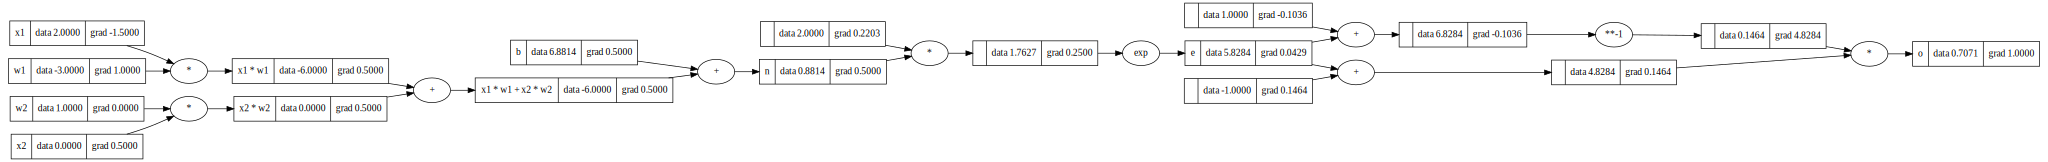

In [32]:
# Instead of using the tanh function, we can break it down into its atomic operations and the gradients will be the same
# The level at which we implement the operations is totally up to us
# We can implement the operations at the atomic level or at a higher level as long as we can perform both forward and backward passes

# Inputs x1, x2
x1 = Value(2.0, _label='x1')
x2 = Value(0.0, _label='x2')

# Weights w1, w2
w1 = Value(-3.0, _label='w1')
w2 = Value(1.0, _label='w2')

# Bias of the neuron
b = Value(6.8813735870195432, _label='b')

# x1 * w1
x1w1 = x1 * w1; x1w1._label = 'x1 * w1'
# x2 * w2
x2w2 = x2 * w2; x2w2._label = 'x2 * w2'

# x1 * w1 + x2 * w2
x1w1x2w2 = x1w1 + x2w2  ; x1w1x2w2._label = 'x1 * w1 + x2 * w2'

# x1 * w1 + x2 * w2 + b
n = x1w1x2w2 + b; n._label = 'n'

# tanh(x1 * w1 + x2 * w2 + b) = (exp(2 * (x1 * w1 + x2 * w2 + b)) - 1) / (exp(2 * (x1 * w1 + x2 * w2 + b)) + 1)
e = (2 * n).exp(); e._label = 'e'

o = (e - 1) / (e + 1); o._label = 'o'

o.backward()

draw_dot(o)

In [33]:
# Micrograd is a minimalistic autograd library that supports automatic differentiation for scalar values
# In PyTorch, the gradients are calculated for tensors, which are multi-dimensional arrays that can represent scalars, vectors, matrices, etc.
# The gradients are calculated for the entire tensor at once and not for individual elements of the tensor
# This is more efficient because the gradients can be calculated in parallel for all the elements of the tensor

# We need to set the requires_grad attribute to True for the tensors for which we want to track the gradients
# This is by default set to False to save memory and computation

import torch

# Inputs x1,x2
x1 = torch.Tensor([2.0]).double(); x1.requires_grad = True
x2 = torch.Tensor([0.0]).double(); x2.requires_grad = True

# Weights w1, w2
w1 = torch.Tensor([-3.0]).double(); w1.requires_grad = True
w2 = torch.Tensor([1.0]).double(); w2.requires_grad = True

# Bias of the neuron
b = torch.Tensor([6.8813735870195432]).double(); b.requires_grad = True

# x1 * w1
x1w1 = x1 * w1

# x2 * w2
x2w2 = x2 * w2

# x1 * w1 + x2 * w2
x1w1x2w2 = x1w1 + x2w2

# x1 * w1 + x2 * w2 + b
n = x1w1x2w2 + b

# tanh(x1 * w1 + x2 * w2 + b)
o = torch.tanh(n)

print("o", o.data.item())

o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

o 0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [ ]:
# Now that we have some machinery to build out complicated mathematical expressions and calculate their gradients, we can start building neural networks
# A neural network is a just a specific class of mathematical expressions used to model complex relationships between inputs and outputs

import random

class Neuron:
    def __init__(self, nin):        
        # Create a list of weights for each input, initialized with random values
        # Each weight influences how much each input contributes to the neuron's output
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        
        # The bias allows the model to adjust the output independently of the input
        self.b = Value(random.uniform(-1, 1))

    def __call__(self, x):
        # The input x is expected to be a list of values, corresponding to the inputs
        
        # Calculate the activation value (act) by multiplying each weight with its corresponding input
        # and summing up all the results. The bias is added to this sum.
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        
        # Apply the hyperbolic tangent (tanh) activation function to the activation value
        # This function squashes the output to a range between -1 and 1
        out = act.tanh()
        
        return out
    
    def parameters(self):
        return self.w + [self.b]

class Layer:
    def __init__(self, nin, nout):
        # Create a list of neurons, each initialized with nin inputs.
        # This means each neuron in this layer will take the same number of inputs.
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        # For each neuron in the layer, compute its output by calling it with input x.
        outs = [n(x) for n in self.neurons]
        
        # Return the list of outputs from each neuron in the layer
        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]
    
class MLP:
    def __init__(self, sizes):
        # Create a list of layers, each initialized with the number of inputs and outputs.
        # The number of inputs for each layer is equal to the number of outputs from the previous layer.
        self.layers = [Layer(nin, nout) for nin, nout in zip(sizes[:-1], sizes[1:])]

    def __call__(self, x):
        # For each layer in the network, compute its output by calling it with input x.
        for layer in self.layers:
            x = layer(x)
    
        # Return the final output from the last layer in the network
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

In [35]:
# Let's create a simple neural network with 3 input neurons, 3 neurons in the hidden layer, and 1 output neuron
# The network will have the following architecture: 2 -> 3 -> 1
x = [2.0, 3.0]
mlp = MLP([2, 3, 1])

# The network can be called with the input x to get the output
out = mlp(x)

out

Value(data=0.3855540232999886, grad=0.0)

In [36]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]

# These are the expected outputs for the given inputs
# We have a simple binary classification problem where the output is 1.0 for the first two inputs and -1.0 for the last two inputs
# Somehow, we need to adjust the weights and biases of the network so that it can correctly predict these outputs
ys = [1.0, -1.0, -1.0, 1.0]

ys_pred = [mlp(x) for x in xs]

ys_pred

[Value(data=0.3855540232999886, grad=0.0),
 Value(data=0.012492515621070266, grad=0.0),
 Value(data=0.39817451766420525, grad=0.0),
 Value(data=0.5697328456294789, grad=0.0)]

In [37]:
# The trick used in deep learning is to define a loss function that measures how far off the predictions are from the actual values
# The loss function is then used to adjust the weights and biases of the network to minimize the loss
# In this example, we will use the mean squared error (MSE) loss function

def mse_loss(y_pred, y_true):
    # Calculate the squared error for each pair of predicted and true values
    errors = [(p - t) ** 2 for p, t in zip(y_pred, y_true)]
    
    # Return the average of all the squared errors
    return sum(errors) / len(errors)

# The loss is a measure of how far off the predictions are from the actual values
# The goal of training a neural network is to minimize this loss
# A loss of 0 means the predictions are perfect
loss = mse_loss(ys_pred, ys)

loss

Value(data=0.8856766896117884, grad=0.0)

In [38]:
loss.backward()

# Since the gradient of this particular weight of this particular neuron of this particular layer is negative, we know 
# that its influence on the loss is negative and increasing it will decrease the loss
mlp.layers[0].neurons[0].w[0].grad

-0.19577564795144575

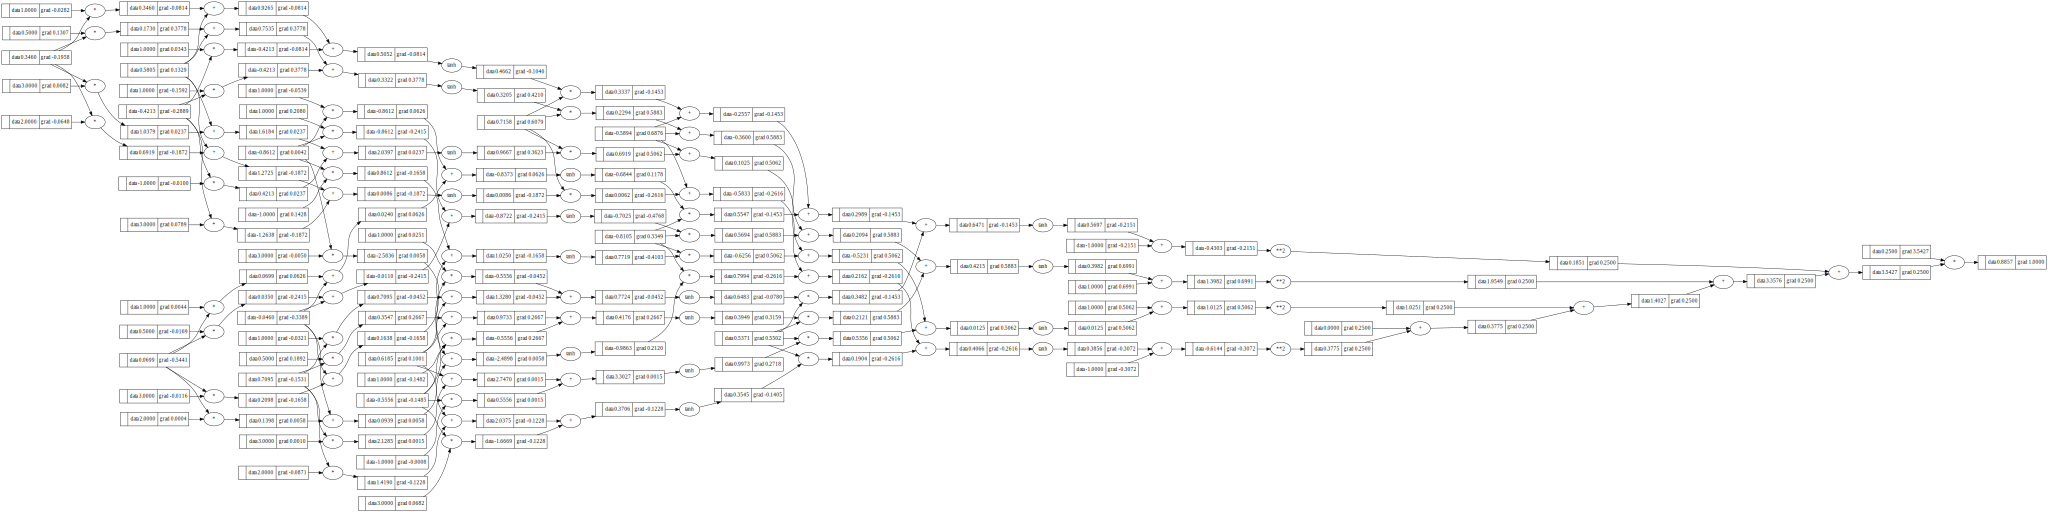

In [39]:
draw_dot(loss)

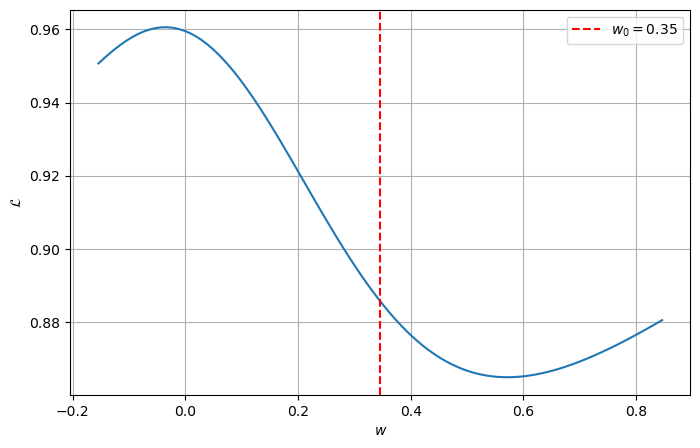

In [40]:
# Store the initial value of the weight w0 from the first layer's first neuron
w0 = mlp.layers[0].neurons[0].w[0].data

# Generate 100 evenly spaced weight values in the range [w0 - 0.5, w0 + 0.5]
w_values = np.linspace(mlp.layers[0].neurons[0].w[0].data - 0.5, mlp.layers[0].neurons[0].w[0].data + 0.5, 100)

# Initialize an empty list to store the loss values corresponding to each weight
loss_values = []

# Loop over each weight value and compute the corresponding loss
for w in w_values:
    # Update the weight in the model to the current value
    mlp.layers[0].neurons[0].w[0].data = w
    
    # Compute predictions for all input data points (xs) using the current weight
    ys_pred = [mlp(x) for x in xs]
    
    # Compute the mean squared error (MSE) loss between predictions and true labels (ys)
    loss = mse_loss(ys_pred, ys)
    
    # Store the computed loss value
    loss_values.append(loss.data)

# After the loop, reset the weight to its original value (w0)
mlp.layers[0].neurons[0].w[0].data = w0

# Plot the loss values as a function of weight
plt.figure(figsize=(8, 5))
plt.plot(w_values, loss_values)
plt.axvline(x=w0, color='r', linestyle='--', label=r'$w_0=%.2f$' % w0)
plt.xlabel(r'$w$')
plt.ylabel(r'$\mathcal{L}$')
plt.grid(True)
plt.show()


In [41]:
# Increase or decrease the weight based on the gradient by a small amount just to verify that the loss decreases

iters = 1000
learning_rate = 0.1

for k in range(iters + 1):

  # Forward pass
  ys_pred = [mlp(x) for x in xs]
  loss = mse_loss(ys_pred, ys)
  
  # Backward pass
  for p in mlp.parameters():
    # We need to reset the gradients to zero before calculating them
    # If we don't reset them, the gradients will accumulate, leading to incorrect gradient computations and ultimately incorrect weight updates
    # This is a common mistake in deep learning frameworks (always remember to .zero_grad() before calculating gradients)
    p.grad = 0.0
  loss.backward()
  
  # Update weights and biases
  for p in mlp.parameters():
    # Update the weights and biases using the gradients and the learning rate
    # We subtract the product of the learning rate and the gradient because we want to move in the opposite direction of the gradient to minimize the loss
    # If we were using PyTorch, we would need to call torch.no_grad() to prevent PyTorch from tracking the computation history
    # Since we can directly manipulate the values in our custom Value class, we don't need to worry about this
    p.data -= learning_rate * p.grad
  
  if k % 50 == 0:
    print(k, loss.data)

# The loss has decreased significantly after training the network
# This means the network has learned to predict the correct outputs for the given inputs
ys_pred

0 0.8856766896117884
50 0.30808937684748655
100 0.13154752118813368
150 0.06355810167909179
200 0.03757422836040518
250 0.02541151853109877
300 0.01871907611328391
350 0.014598240059232166
400 0.011850579780947612
450 0.009908258577054756
500 0.00847290941826831
550 0.0073747369509405535
600 0.006510835853462356
650 0.00581559376797973
700 0.005245395936259429
750 0.004770223652202305
800 0.004368798302349824
850 0.004025651064851551
900 0.003729288106366101
950 0.0034710043884368076
1000 0.0032440950609411456


[Value(data=0.996773983151715, grad=-0.0016130084241425258),
 Value(data=-0.9451933128427111, grad=0.027403343578644435),
 Value(data=-0.9330388519848668, grad=0.0334805740075666),
 Value(data=0.9259837534159043, grad=-0.037008123292047834)]